In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
x=pd.read_csv(r'C:\Users\Rajaganapathy ms\Downloads\Train_Inpatientdata-1542865627584.csv')


In [3]:
x.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [23]:
x['ClaimStartDt']=pd.to_datetime(x['ClaimStartDt'])
x['ClaimEndDt']=pd.to_datetime(x['ClaimEndDt'])
x['AdmissionDt']=pd.to_datetime(x['AdmissionDt'])
x['DischargeDt']=pd.to_datetime(x['DischargeDt'])
x.dtypes

BeneID                            object
ClaimID                           object
ClaimStartDt              datetime64[ns]
ClaimEndDt                datetime64[ns]
Provider                          object
InscClaimAmtReimbursed             int64
AttendingPhysician                object
OperatingPhysician                object
OtherPhysician                    object
AdmissionDt               datetime64[ns]
ClmAdmitDiagnosisCode             object
DeductibleAmtPaid                float64
DischargeDt               datetime64[ns]
DiagnosisGroupCode                object
ClmDiagnosisCode_1                object
ClmDiagnosisCode_2                object
ClmDiagnosisCode_3                object
ClmDiagnosisCode_4                object
ClmDiagnosisCode_5                object
ClmDiagnosisCode_6                object
ClmDiagnosisCode_7                object
ClmDiagnosisCode_8                object
ClmDiagnosisCode_9                object
ClmDiagnosisCode_10               object
ClmProcedureCode

In [ ]:
# number of non null values

In [4]:
x.count()

BeneID                    40474
ClaimID                   40474
ClaimStartDt              40474
ClaimEndDt                40474
Provider                  40474
InscClaimAmtReimbursed    40474
AttendingPhysician        40362
OperatingPhysician        23830
OtherPhysician             4690
AdmissionDt               40474
ClmAdmitDiagnosisCode     40474
DeductibleAmtPaid         39575
DischargeDt               40474
DiagnosisGroupCode        40474
ClmDiagnosisCode_1        40474
ClmDiagnosisCode_2        40248
ClmDiagnosisCode_3        39798
ClmDiagnosisCode_4        38940
ClmDiagnosisCode_5        37580
ClmDiagnosisCode_6        35636
ClmDiagnosisCode_7        33216
ClmDiagnosisCode_8        30532
ClmDiagnosisCode_9        26977
ClmDiagnosisCode_10        3927
ClmProcedureCode_1        23148
ClmProcedureCode_2         5454
ClmProcedureCode_3          965
ClmProcedureCode_4          116
ClmProcedureCode_5            9
ClmProcedureCode_6            0
dtype: int64

In [25]:
num=x.select_dtypes(include=np.number)
num

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,26000,1068.0,NaN,NaN,NaN,NaN,NaN,NaN
1,5000,1068.0,7092.0,NaN,NaN,NaN,NaN,NaN
2,5000,1068.0,NaN,NaN,NaN,NaN,NaN,NaN
3,5000,1068.0,331.0,NaN,NaN,NaN,NaN,NaN
4,10000,1068.0,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
40469,7000,1068.0,9904.0,NaN,NaN,NaN,NaN,NaN
40470,4000,1068.0,8605.0,NaN,NaN,NaN,NaN,NaN
40471,3000,1068.0,9390.0,NaN,NaN,NaN,NaN,NaN
40472,5000,1068.0,NaN,NaN,NaN,NaN,NaN,NaN


There are 8 numerical variables.

In [27]:
cat=x.select_dtypes(include=object)
cat

,BeneID,ClaimID,Provider,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10
0,BENE11001,CLM46614,PRV55912,PHY390922,NaN,NaN,7866,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN
1,BENE11001,CLM66048,PRV55907,PHY318495,PHY318495,NaN,6186,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,PRV56046,PHY372395,NaN,PHY324689,29590,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,PRV52405,PHY369659,PHY392961,PHY349768,431,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN
4,BENE11014,CLM63689,PRV56614,PHY379376,PHY398258,NaN,78321,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,PRV53671,PHY345332,PHY319565,NaN,2859,812,2851,2762,53550,V0254,V1005,5173,79092,70704,2869,4148
40470,BENE159175,CLM74504,PRV54981,PHY342806,PHY365497,NaN,79902,228,42823,4148,4019,3970,4241,V1042,49122,4254,5990,NaN
40471,BENE159177,CLM76485,PRV56588,PHY423220,PHY332752,NaN,78605,302,4280,3963,5859,4019,40390,4111,71534,71590,V4502,NaN
40472,BENE159177,CLM79949,PRV56575,PHY353156,NaN,NaN,7802,309,7802,5859,496,2809,V1254,42822,4263,0414,41400,NaN


There are 18 categorical variables.

In [7]:
x.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [39]:
#most repeated value in categorical variables

cat.mode()

,BeneID,ClaimID,Provider,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10
0,BENE134170,CLM31001,PRV52019,PHY422134,PHY429430,PHY416093,78650,882,486,4019,4019,4019,4019,4019,4019,4019,4019,4019
1,NaN,CLM31004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,CLM31005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,CLM31006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,CLM31007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,NaN,CLM82216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40470,NaN,CLM82217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40471,NaN,CLM82218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40472,NaN,CLM82219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
cat.describe()

,BeneID,ClaimID,Provider,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10
count,40474,40474,40474,40362,23830,4690,40474,40474,40474,40248,39798,38940,37580,35636,33216,30532,26977,3927
unique,31289,40474,2092,11604,8287,2877,1928,736,2254,2439,2427,2441,2374,2358,2310,2243,2094,952
top,BENE134170,CLM40093,PRV52019,PHY422134,PHY429430,PHY416093,78650,882,486,4019,4019,4019,4019,4019,4019,4019,4019,4019
freq,8,1,516,386,225,81,1731,179,1499,2484,2282,2100,1889,1620,1402,1200,965,128


## Graphical representation of Null values

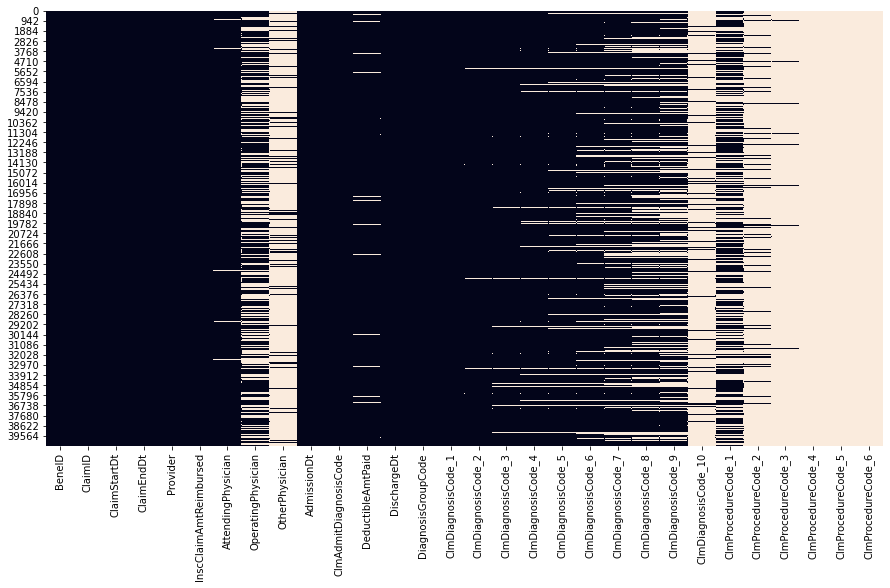

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(x.isnull(), cbar = False)
plt.show()

## Numerical representation of null values

In [33]:

total = x.isnull().sum().sort_values(ascending=False)

percent = ((x.isnull().sum()/x.shape[0])*100)
 
percent = percent.sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data['Type'] = x[missing_data.index].dtypes

missing_data

,Total,Percent,Type
ClmProcedureCode_6,40474,100.000000,float64
ClmProcedureCode_5,40465,99.977764,float64
ClmProcedureCode_4,40358,99.713396,float64
ClmProcedureCode_3,39509,97.615753,float64
ClmDiagnosisCode_10,36547,90.297475,object
OtherPhysician,35784,88.412314,object
ClmProcedureCode_2,35020,86.524683,float64
ClmProcedureCode_1,17326,42.807728,float64
OperatingPhysician,16644,41.122696,object
ClmDiagnosisCode_9,13497,33.347334,object


In [35]:
x=st.trim_mean(num,proportiontocut=0.25)
y=num.mean()
z=num.median()
pd.DataFrame([x,y,z],index=['Trimmed_mean','Mean','Median'],columns=num.columns)

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
Trimmed_mean,7359.789505,1068.0,NaN,NaN,NaN,NaN,NaN,NaN
Mean,10087.884074,1068.0,5894.611759,4103.738174,4226.35544,4070.172414,5269.444444,NaN
Median,7000.000000,1068.0,5369.000000,4019.000000,4019.00000,4019.000000,4139.000000,NaN
